# This is the implementation of the AI subject with code.

import the libraries  for the work 
1. numpy 
2. matplotlib
3. pandas


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "Book1.csv"
dataset = pd.read_csv(path)
dataset

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print(X)
print(Y)

from sklearn.impute import SimpleImputer


imputer =  SimpleImputer(missing_values= np.NaN,strategy="mean")

print(dataset)

imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(X)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(Y)
print(y)

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2 , random_state = 1)

print(X,y)



[['pakistan' 18.0 2000.0]
 ['afghanistan' 19.0 2000.0]
 ['bangal' 20.0 2100.0]
 ['india' 50.0 2300.0]
 ['france' nan 2900.0]
 ['england' 16.0 nan]]
['yes ' 'no' 'yes ' 'yes ' 'yes ' 'no']
       Country   age   salry parchase
0     pakistan  18.0  2000.0     yes 
1  afghanistan  19.0  2000.0       no
2       bangal  20.0  2100.0     yes 
3        india  50.0  2300.0     yes 
4       france   NaN  2900.0     yes 
5      england  16.0     NaN       no
[['pakistan' 18.0 2000.0]
 ['afghanistan' 19.0 2000.0]
 ['bangal' 20.0 2100.0]
 ['india' 50.0 2300.0]
 ['france' 24.6 2900.0]
 ['england' 16.0 2260.0]]
[[0.0 0.0 0.0 0.0 0.0 1.0 18.0 2000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 19.0 2000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 20.0 2100.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 50.0 2300.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 24.6 2900.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 16.0 2260.0]]
[1 0 1 1 1 0]
[[0.0 0.0 0.0 0.0 0.0 1.0 18.0 2000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 19.0 2000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 20.0 2100.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 50

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Choose a Machine Learning Algorithm
model = LogisticRegression()

# Step 2: Fit the Model to Training Data
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


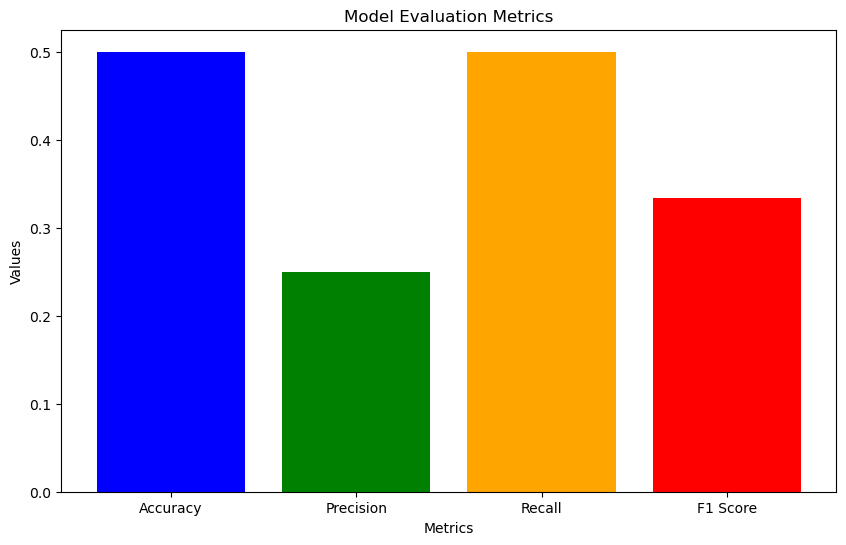

In [6]:
# Step 1: Choose a Machine Learning Algorithm
model = LogisticRegression()

# Step 2: Fit the Model to Training Data
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Additional Evaluation Metrics
precision = classification_rep['weighted avg']['precision']
recall = classification_rep['weighted avg']['recall']
f1_score = classification_rep['weighted avg']['f1-score']

# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

Explanation with Details:
<h5>

<h1>Model Training:</h1>

We initialize a logistic regression model using LogisticRegression() from scikit-learn.
The model is then trained on the training data using model.fit(X_train, y_train), where X_train is the feature matrix of the training set and y_train is the corresponding target labels.
<h1>Making Predictions:</h1>

After training the model, we use it to make predictions on the test data with model.predict(X_test). The predicted labels are stored in y_pred.
<h1>Model Evaluation: </h1>

We compute the accuracy of the model using accuracy_score(y_test, y_pred) from scikit-learn. This function compares the predicted labels (y_pred) with the actual labels (y_test) and returns the accuracy.
Additionally, we generate a classification report using classification_report(y_test, y_pred, output_dict=True) from scikit-learn. Setting output_dict to True returns the report as a dictionary, which allows us to extract precision, recall, and F1-score for further analysis.
<h1>Creating a Bar Plot:</h1>

To visualize the model evaluation metrics, we create a bar plot using matplotlib.
We define a list metrics containing the names of the evaluation metrics ('Accuracy', 'Precision', 'Recall', 'F1 Score') and a corresponding list values containing their respective values.
The plt.bar() function is used to create a bar plot with the specified metrics and values.
We customize the plot by setting the figure size, title, x-label, and y-label using plt.figure(), plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively.
Finally, we display the plot using plt.show().
This bar plot provides a visual representation of the model's performance across different evaluation metrics, making it easier to interpret and compare the results.








In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [44]:
path = "Book1.csv"
dataset = pd.read_csv(path)
dataset

,Country,age,salry,parchase
0,pakistan,18.0,2000.0,yes
1,afghanistan,19.0,2000.0,no
2,bangal,20.0,2100.0,yes
3,india,50.0,2300.0,yes
4,france,NaN,2900.0,yes
5,england,16.0,NaN,no


In [45]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print(X)
Y

[['pakistan' 18.0 2000.0]
 ['afghanistan' 19.0 2000.0]
 ['bangal' 20.0 2100.0]
 ['india' 50.0 2300.0]
 ['france' nan 2900.0]
 ['england' 16.0 nan]]


array(['yes ', 'no', 'yes ', 'yes ', 'yes ', 'no'], dtype=object)

The miss values will be fill by nan by the compiler

In [46]:
from sklearn.impute import SimpleImputer


In [47]:
imputer =  SimpleImputer(missing_values= np.NaN,strategy="mean")

dataset

,Country,age,salry,parchase
0,pakistan,18.0,2000.0,yes
1,afghanistan,19.0,2000.0,no
2,bangal,20.0,2100.0,yes
3,india,50.0,2300.0,yes
4,france,NaN,2900.0,yes
5,england,16.0,NaN,no


fit X in the Impute

In [48]:
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

[['pakistan' 18.0 2000.0]
 ['afghanistan' 19.0 2000.0]
 ['bangal' 20.0 2100.0]
 ['india' 50.0 2300.0]
 ['france' 24.6 2900.0]
 ['england' 16.0 2260.0]]


Now we need to convert the string data into 0,1 form.

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X test data: 20% of data use for the testing. dependent variables 
X train data: 80% of the data is use for the training the model.
y test: 
y train:

Now we will spite the data into train and test data.

random state: if someone dievied the data into the test and train data, so we select the random that everytime the data change.

Scale / normalization: for which well will used Stander Scaler. to reduce the values 
Lable encoder: its can write the catagolecal data in lable form.




In [50]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')

In [51]:
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 0.0 0.0 1.0 18.0 2000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 19.0 2000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 20.0 2100.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 50.0 2300.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 24.6 2900.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 16.0 2260.0]]


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()
y = le.fit_transform(Y)
print(y)

[1 0 1 1 1 0]


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2 , random_state = 1)

In [57]:
print(X,y)

[[0.0 0.0 0.0 0.0 0.0 1.0 18.0 2000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 19.0 2000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 20.0 2100.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 50.0 2300.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 24.6 2900.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 16.0 2260.0]] [1 0 1 1 1 0]
